<a href="https://colab.research.google.com/github/vishnusureshperumbavoor/colab_playground/blob/main/yolov11_sam_kidney_detection_and_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://app.roboflow.com/vspenterprises/kidney-zndwa-vmmhl/1

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NK0zMF5WYZB8NVvAMrj4")
project = rf.workspace("vspenterprises").project("kidney-zndwa-vmmhl")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 133.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kidney-1 in yolov11:: 100%|██████████| 204/204 [00:00<00:00, 7648.30it/s]


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/kidney-1/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kidney-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False

In [ ]:
from IPython.display import Image

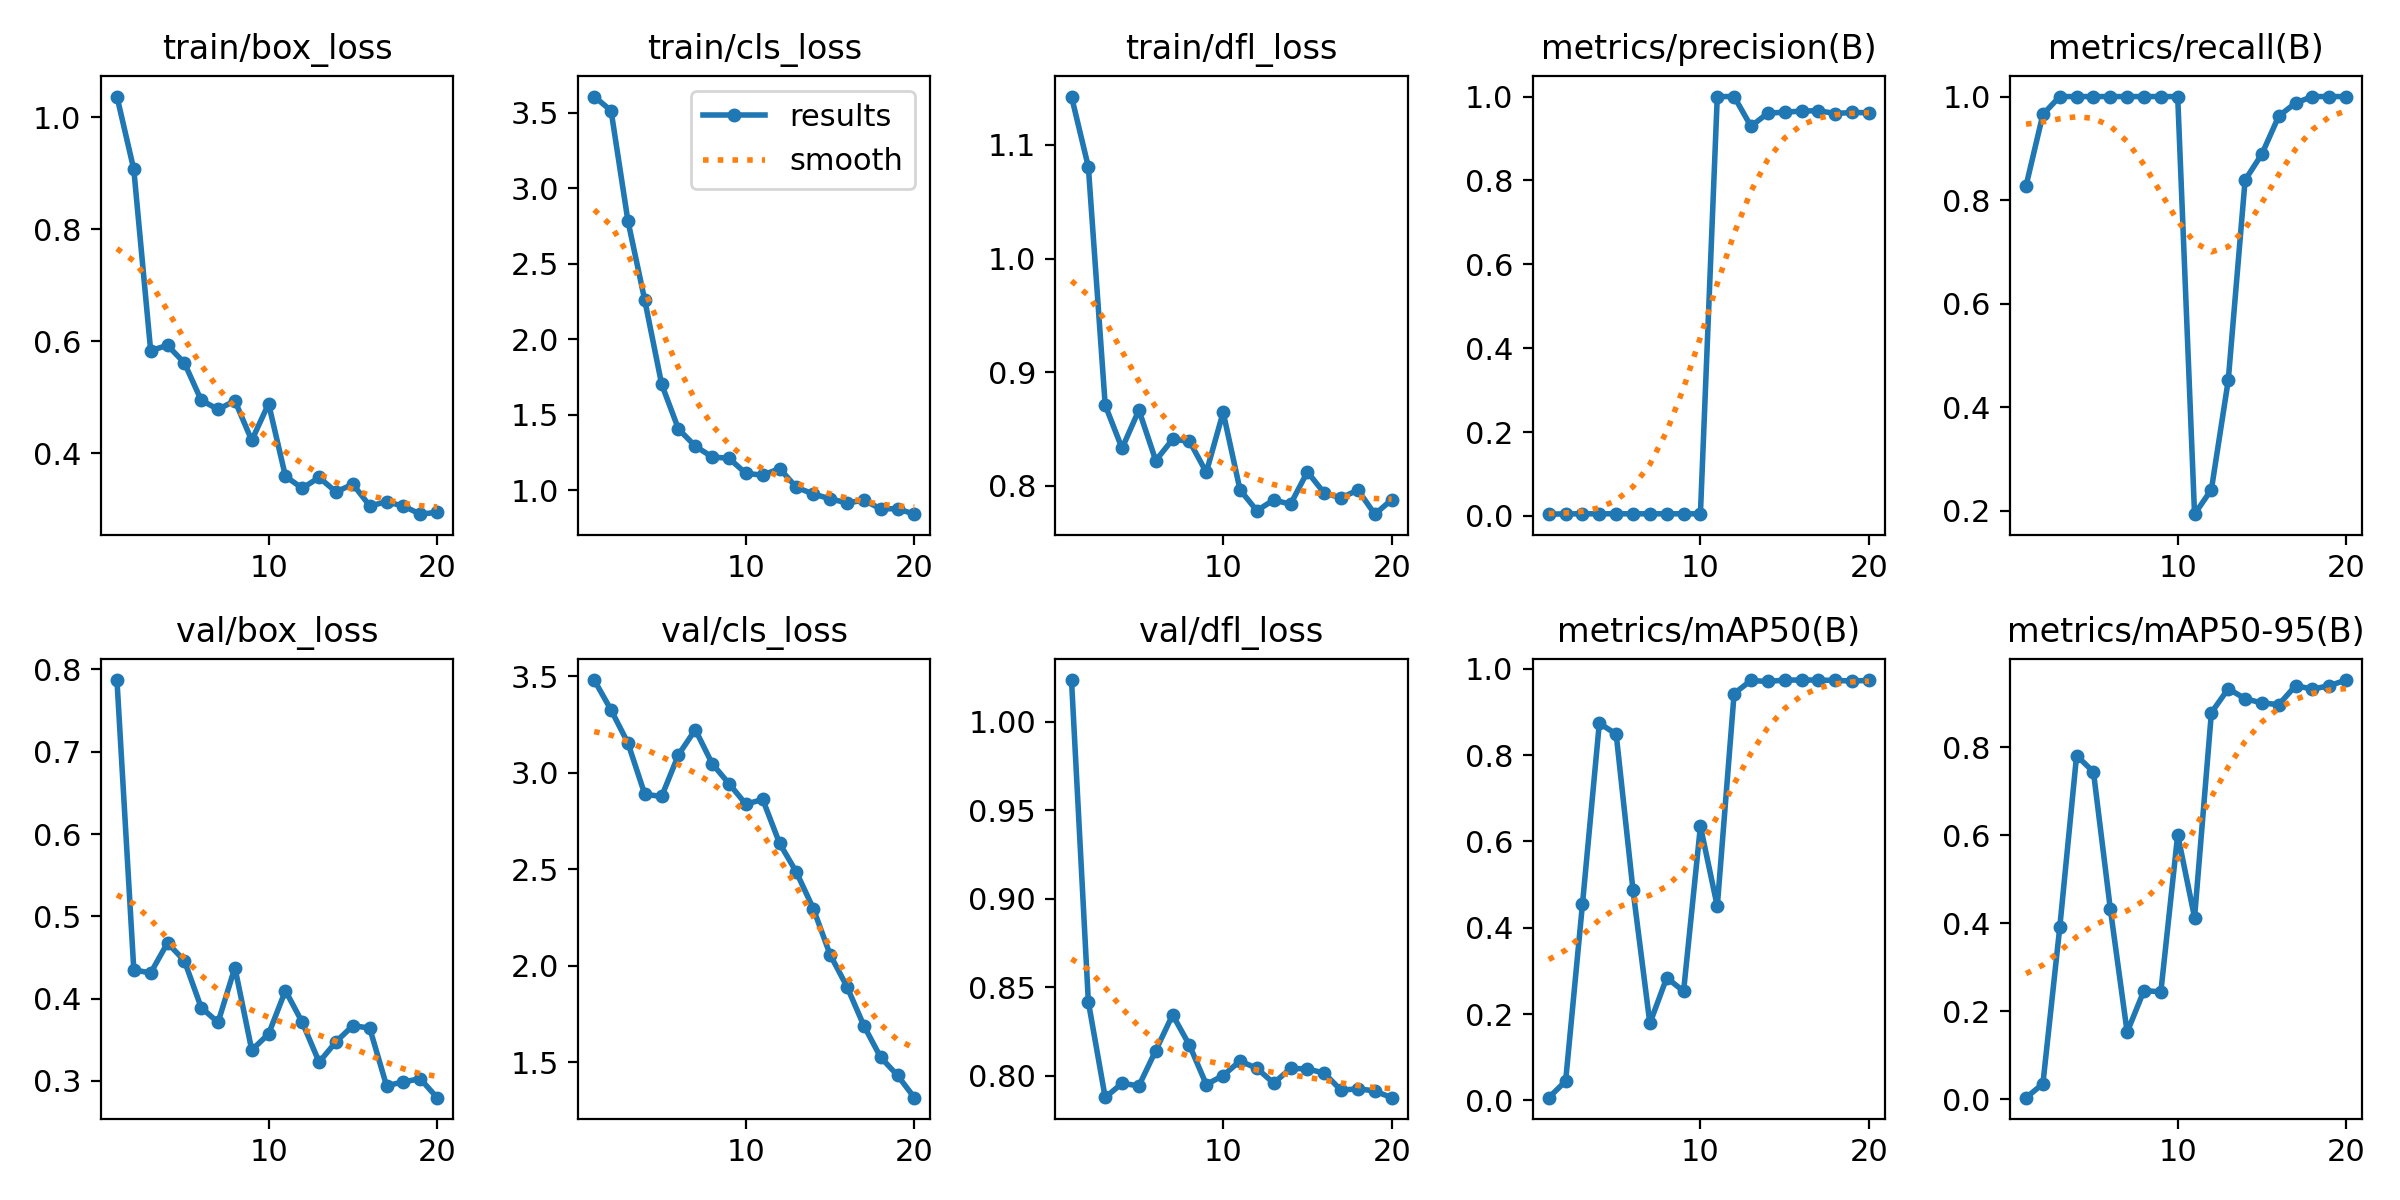

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)


image 1/1 /content/images.jpg: 576x640 2 kidneys, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)
Results saved to /content/runs/detect/predict2


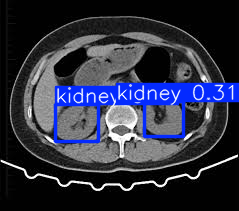

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform object detection on an image with a lower confidence threshold
# For example, setting conf=0.1 to detect objects with at least 10% confidence
results = model("/content/images.jpg", save=True, conf=0.1)
results[0].show()

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

Confidence scores: [0.3135441541671753, 0.17244713008403778]



image 1/1 /content/images.jpg: 576x640 2 kidneys, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)
Results saved to /content/runs/segment/predict6


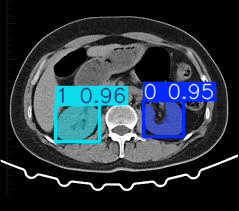

In [ ]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images with a lower confidence threshold
results = yolo_model("/content/images.jpg", conf=0.1)  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)
         for sam_result in sam_results:
             sam_result.show()